<h1>IMPORT DATA</h1>

In [682]:
from sklearn.metrics import silhouette_samples, silhouette_score 
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import time
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 

In [492]:
pd.set_option("display.max_rows", 15, "display.max_columns", None)
data = pd.read_csv("./BDD/Motor___MDS-UPDRS/Gait_Data___Arm_swing.csv")

data_pd=data[data.COHORT == 3]
data_pd

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,TRA_U,T_AMP_U,CAD_U,STR_T_U,STR_CV_U,STEP_REG_U,STEP_SYM_U,JERK_T_U,SP__DT,RA_AMP_DT,LA_AMP_DT,RA_STD_DT,LA_STD_DT,SYM_DT,R_JERK_DT,L_JERK_DT,ASA_DT,ASYM_IND_DT,TRA_DT,T_AMP_DT,CAD_DT,STR_T_DT,STR_CV_DT,STEP_REG_DT,STEP_SYM_DT,JERK_T_DT,SW_VEL_OP,SW_PATH_OP,SW_FREQ_OP,SW_JERK_OP,SW_VEL_CL,SW_PATH_CL,SW_FREQ_CL,SW_JERK_CL,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,12.806257,3.555864,119.239701,1.709821,23.580869,0.171958,0.189310,0.079108,0.975,23.945266,54.069940,5.816408,3.961604,0.557285,0.001436,0.011285,23.498889,38.733138,17.197593,3.945442,108.706783,1.864720,20.781352,0.312550,0.436560,0.044208,0.002073,5.766604,0.921466,0.750949,0.002139,3.730654,0.297881,0.364307,15.398438,17.244141,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
7,42418,V04,03/2018,3.0,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,0.007078,0.007961,19.653523,32.064875,19.226479,3.977869,107.794695,1.269062,13.395844,0.234673,0.408922,0.092929,0.779,27.371289,39.575880,10.127438,6.473808,0.301420,0.025731,0.028327,11.426963,18.271485,22.304481,5.267111,87.160214,1.971967,16.502765,0.504975,0.931118,0.063966,0.002190,5.651372,0.831569,0.747314,0.000799,6.152317,1.259545,0.884009,15.953125,14.739258,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
9,42418,BL,02/2017,3.0,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,0.005900,0.004559,24.238172,40.296854,24.885712,2.601132,106.645880,2.351172,2.700487,0.723908,0.959485,0.092294,0.804,24.295717,33.564128,6.235771,9.474984,0.277109,0.009712,0.014114,10.480642,16.705206,2.412494,6.928701,94.487187,2.588379,5.953238,0.672726,1.057190,0.040569,0.003300,3.387452,0.388212,0.290920,0.002562,8.193084,1.040339,1.754837,13.398438,9.972656,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265
10,42415,V06,12/2018,3.0,0.665,11.843002,6.404077,1.734591,1.928359,0.868273,0.001640,0.010689,18.316081,29.695992,16.631136,3.626484,115.052177,2.203125,1.862968,0.895169,1.053344,0.138602,0.567,9.306457,5.165961,1.735653,1.492283,0.810312,0.000936,0.012684,17.712225,28.606353,22.926633,3.475781,109.450951,2.303646,2.038314,0.904489,1.040902,0.091065,0.001072,3.765705,1.039734,0.311411,0.002138,4.717254,0.887714,0.534462,11.859375,12.817383,0.515625,2.558594,0.608660,1.369122,11.984375,14.370117,0.523438,2.125000,0.606072,0.867862
11,42357,V04,01/2018,3.0,0.881,7.695238,3.838619,2.113256,1.966532,1.096781,0.003949,0.012787,20.539172,33.748736,23.407828,3.873875,125.612402,1.998621,1.808469,0.922576,1.013801,0.224648,0.855,4.290504,2.230918,1.565379,0.908737,0.940744,0.002864,0.003614,19.417299,31.567932,26.799568,2.396258,63.960320,2.946615,2.823707,0.907645,1.080365,0.039922,0.001186,2.452867,0.591632,0.139667,0.002313,3.791853,0.637281,0.139667,13.562500,17.062500,0.523438,2.222656,0.596043,1.098940,11.195312,16.933594,0.468750,1.539062,0.509521,1.191527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,42346,V8,11/2019,3.0,0.962,31.606168,18.130465,3.951196,4.068392,0.846723,0.006755,0.011290,17.158582,27.935341,18.117304,1.604692,109.685481,2.418750,5.362980,0.891730,1.004433,0.495221,0.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001828,2.515349,0.980624,0.147490,0.003529,3.646111,0.511082,0.307857,11.945312,13.317871,8.523438,1.449219,0.570403,1.190323,16.609375,15.340820,10.671875,2.371094,0.353583,1.793525
172,42415,

In [372]:
L1=[]
L3=[]
Ln=[]
for k in range( len(data.values[:,3]) ):
    if data.values[k,3]==1.0:
        L1.append(k)
    elif data.values[k,3]==3.0:
        L3.append(k)
    else:
        Ln.append(k)


<h1>CLEANING DATA</h1>

In [373]:
data_process=data.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1)

In [374]:
data_filled=data_process.fillna(data_process.mean())
data_filled

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,TRA_U,T_AMP_U,CAD_U,STR_T_U,STR_CV_U,STEP_REG_U,STEP_SYM_U,JERK_T_U,SP__DT,RA_AMP_DT,LA_AMP_DT,RA_STD_DT,LA_STD_DT,SYM_DT,R_JERK_DT,L_JERK_DT,ASA_DT,ASYM_IND_DT,TRA_DT,T_AMP_DT,CAD_DT,STR_T_DT,STR_CV_DT,STEP_REG_DT,STEP_SYM_DT,JERK_T_DT,SW_VEL_OP,SW_PATH_OP,SW_FREQ_OP,SW_JERK_OP,SW_VEL_CL,SW_PATH_CL,SW_FREQ_CL,SW_JERK_CL,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,1.445000,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,15.460948,5.848241,1.515544,121.858032,2.086857,9.695562,0.895523,1.034529,0.308086,1.294000,43.400615,28.585174,1.518266,2.730496,0.520676,0.001356,0.002647,12.948480,20.628904,8.854934,3.039683,110.765656,2.282169,9.107048,0.867668,1.128648,0.251367,0.002220,3.362521,0.606840,0.264631,0.001116,4.624927,0.911394,0.517390,10.679688,11.603516,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,1.211000,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,0.961927,4.495013,1.844470,124.932405,1.108796,18.204324,0.847616,1.096712,0.408350,1.083000,40.461258,38.509009,2.889803,1.960981,0.094726,0.001300,0.003064,2.918529,4.589372,9.059862,1.318486,115.166740,2.127298,12.394186,0.821692,1.084477,0.238692,0.000739,3.987392,1.259718,0.352066,0.000491,4.656264,0.998160,0.579636,8.828125,10.854492,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.131000,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,12.806257,3.555864,119.239701,1.709821,23.580869,0.171958,0.189310,0.079108,0.975000,23.945266,54.069940,5.816408,3.961604,0.557285,0.001436,0.011285,23.498889,38.733138,17.197593,3.945442,108.706783,1.864720,20.781352,0.312550,0.436560,0.044208,0.002073,5.766604,0.921466,0.750949,0.002139,3.730654,0.297881,0.364307,15.398438,17.244141,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,1.395000,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,15.628248,12.864062,2.271845,115.152744,1.363281,17.422974,0.396836,0.455293,0.840399,1.374000,50.526484,29.078187,9.154144,6.479747,0.796708,0.003321,0.004698,17.021137,27.560064,18.252199,2.924957,113.181701,2.063368,13.869136,0.796439,1.021863,0.753483,0.003168,3.488662,0.613927,0.268209,0.002861,2.600912,0.591471,0.151052,10.109375,10.029297,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.982000,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,24.756537,13.894265,5.489931,120.418284,1.167643,13.878575,0.506572,7.210779,0.759367,0.990231,44.424253,29.342744,4.503914,4.267904,0.511943,0.028710,0.037304,12.664787,20.189786,17.450813,3.405127,104.749273,1.552649,18.687840,0.773912,1.215303,0.487108,0.001950,3.381051,0.610830,0.257746,0.002441,3.565628,0.669272,0.282145,8.875000,7.782227,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.157192,23.160092,27.543798,3.630631,3.522706,0.158126,0.024499,0.020238,5.585177,8.818220,5.807278,3.115074,109.882244,1.037598,1.037638,0.720560,0.766814,0.315659,0.990231,13.969031,26.566523,5.298619,11.184046,0.441246,0.023170,0.022440,18.009327,29.496778,5.279186,3.769693,60.853459,1.171875,2.207358,0.646497,0.732742,0.214303,0.000406,2.679020,1.624821,0.160248,0.000479,3.796451,1.324485,0.345953,11.359417,12.046624,1.690048,1.812458,0.550445,1.372682,11.143533,11.866767,1.853906,1.786176,0.550877,1.276224
188,1.157192,29.782323,41.685751,9.155024,18.263038,0.811041,0.045

In [375]:
missing=data.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1).isna().sum().sum()
total=data.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1).size
print(missing/total*100, '% de données manquantes')

missing=data_filled.isna().sum().sum()
total=data_filled.size
print(missing/total*100, '% de données manquantes')

7.152157738095238 % de données manquantes
0.0 % de données manquantes


In [376]:
X=data_filled.values



<h1>VAE Tensorflow </h1>

In [377]:
X = tf.cast(X, dtype='float32')

In [378]:
train_size=150
test_size = 42
batch_size = 10




In [379]:
train_dataset = (tf.data.Dataset.from_tensor_slices(X)
                 .shuffle(train_size).batch(batch_size))

test_dataset = (tf.data.Dataset.from_tensor_slices(X)
                .shuffle(test_size).batch(batch_size))



In [564]:
class VAE(tf.keras.Model):
  """variational autoencoder."""

  def __init__(self, latent_dim):
    super(VAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=56),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            
            
            

            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(10),
           
           
            

            
            
            
            tf.keras.layers.Dense(56),
            
                       
            
            
        ]
    )

  @tf.function
  def sample(self):
    
      eps = tf.random.normal(shape=(100, self.latent_dim))
    

  def encode(self, x):
    
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2,axis=1)
    
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z):
    x = self.decoder(z)
    
    return x

In [583]:
optimizer = tf.keras.optimizers.Adam(1e-4)
def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)



@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)

  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [584]:
latent_dim = 2
epochs = 10
model = VAE(latent_dim)


In [625]:
for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
    
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
    
  elbo = -loss.result()
  
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))


Epoch: 1, Test set ELBO: 183910.09375, time elapse for current epoch: 0.058825016021728516
Epoch: 2, Test set ELBO: 134443.65625, time elapse for current epoch: 0.03418779373168945
Epoch: 3, Test set ELBO: 245638.46875, time elapse for current epoch: 0.027913808822631836
Epoch: 4, Test set ELBO: 13588.4111328125, time elapse for current epoch: 0.03408503532409668
Epoch: 5, Test set ELBO: 322791.3125, time elapse for current epoch: 0.03363680839538574
Epoch: 6, Test set ELBO: 326602.4375, time elapse for current epoch: 0.02886033058166504
Epoch: 7, Test set ELBO: 422308.40625, time elapse for current epoch: 0.027428865432739258
Epoch: 8, Test set ELBO: 473764.75, time elapse for current epoch: 0.02775406837463379
Epoch: 9, Test set ELBO: 307232.3125, time elapse for current epoch: 0.03181099891662598
Epoch: 10, Test set ELBO: 606467.9375, time elapse for current epoch: 0.02863597869873047


In [689]:
z_mean,z_logvar= model.encode(X)
z_mean=z_mean.numpy()
L1=np.asarray(L1)
L3=np.asarray(L3)
Ln=np.asarray(Ln)
z_mean1=z_mean[np.asarray(L1)]
z_mean3=z_mean[np.asarray(L3)]
z_meann=z_mean[np.asarray(Ln)]




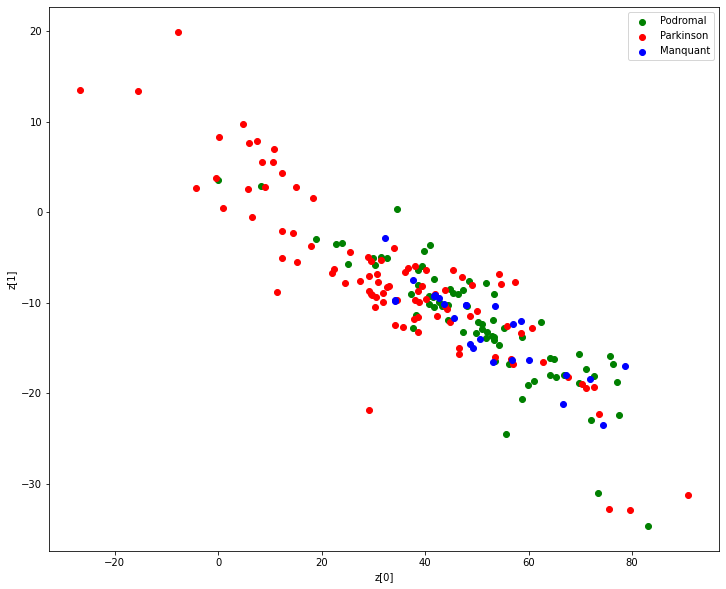

In [700]:



plt.figure(figsize=(12, 10))

plt.scatter(z_mean1[:, 0], z_mean1[:, 1], c='g',label="Podromal")
plt.scatter(z_mean3[:, 0], z_mean3[:, 1], c='r',label="Parkinson")
plt.scatter(z_meann[:, 0], z_meann[:, 1], c='b',label="Manquant")
plt.scatter
plt.legend()

plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()






<h1>KMEANS</h1>

In [720]:
label = KMeans(n_clusters=2).fit_predict(z_mean)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

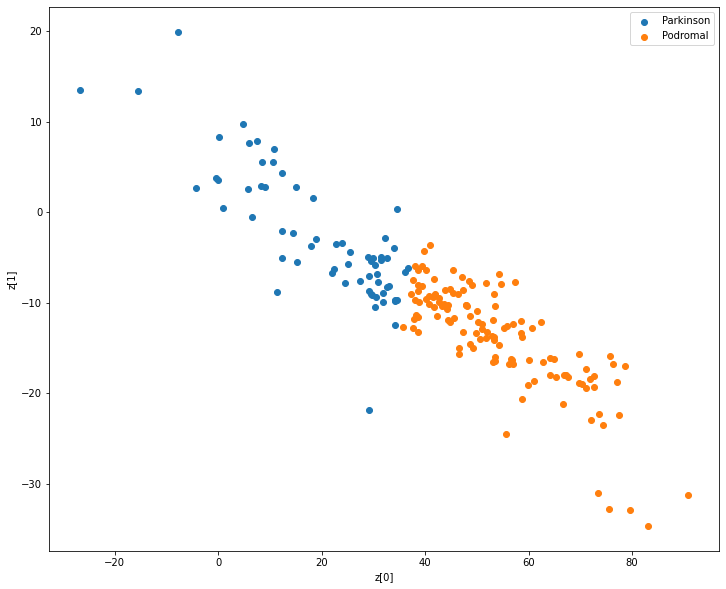

In [725]:
u_labels = np.unique(label)
 
labelP=["Parkinson","Podromal"]
plt.figure(figsize=(12, 10))

#plotting the results:
 
for i in u_labels:
    plt.scatter(z_mean[label == i , 0] , z_mean[label == i , 1] , label =labelP[i] )
plt.legend()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

<h2>ACCURACY</h2>


In [703]:
db=np.zeros((192,), dtype=int)
for k in range( len(data.values[:,3]) ):
    if data.values[k,3]==3.0:
        db[k]=1
    elif data.values[k,3]==1.0:
        db[k]=0
    else:
        db[k]= -1
        
        
db

array([ 0,  0,  1,  0,  0,  0,  0,  1, -1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,
        1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1, -1,
        1,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1, -1,  0,  0,  0, -1, -1,
       -1, -1, -1, -1, -1])

In [705]:
s=0
acc=0
for k in range(192):
    if db[k]!= -1:
        s+=1
        
        if db[k]==label[k]:
            acc=acc+1
        
acc=acc/s*100
print('Précision',acc)   

Précision 68.26347305389223


<h2>PARKINSON SEULEMENT</h2>

In [770]:
data_pd_process=data_pd.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1)


In [771]:
data_pd_filled=data_pd_process.fillna(data_process.mean())

In [500]:
missing=data_pd.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1).isna().sum().sum()
total=data_pd.drop(['PATNO', 'EVENT_ID','INFODT','COHORT'], axis=1).size
print(missing/total*100, '% de données manquantes')

missing=data_pd_filled.isna().sum().sum()
total=data_pd_filled.size
print(missing/total*100, '% de données manquantes')

6.989247311827956 % de données manquantes
0.0 % de données manquantes


In [755]:
X_pd=data_pd_filled.values

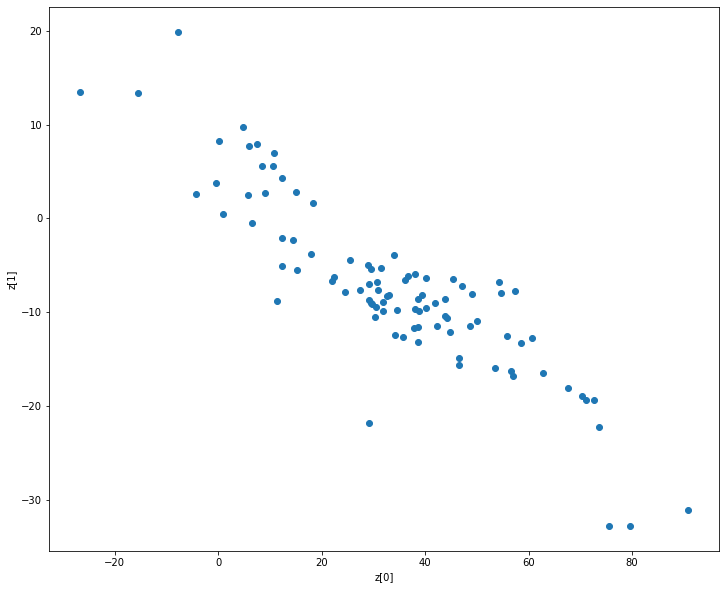

In [764]:
zp_mean,zp_logvar= model.encode(X_pd)

zp_mean=zp_mean.numpy()
plt.figure(figsize=(12, 10))

plt.scatter(zp_mean[:, 0], zp_mean[:, 1])



plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()




In [765]:
inertia=[] #créer une liste vide contenant les coût de k=1:20
K_range=range(1, 10)
for k in K_range:
    modell=KMeans(n_clusters=k).fit(zp_mean)
    inertia.append(modell.inertia_)
    

Text(0, 0.5, 'Coût du modèle (Intertie)')

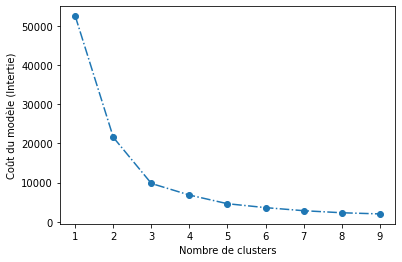

In [766]:
plt.plot(K_range,inertia,"o-.")
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Intertie)')

In [767]:
label = KMeans(n_clusters=3).fit_predict(zp_mean)


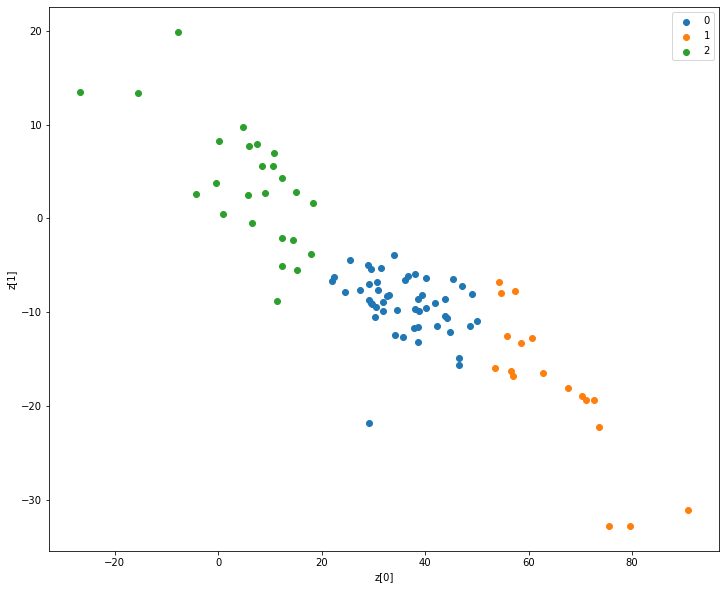

In [768]:
u_labels = np.unique(label)
 

plt.figure(figsize=(12, 10))

#plotting the results:
 
for i in u_labels:
    plt.scatter(zp_mean[label == i , 0] , zp_mean[label == i , 1] , label = i)
plt.legend()
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

<h1>GMM</h1>

In [717]:
gm = GaussianMixture(n_components=2, random_state=0).fit(z_mean)
label_gmm=gm.predict(z_mean)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

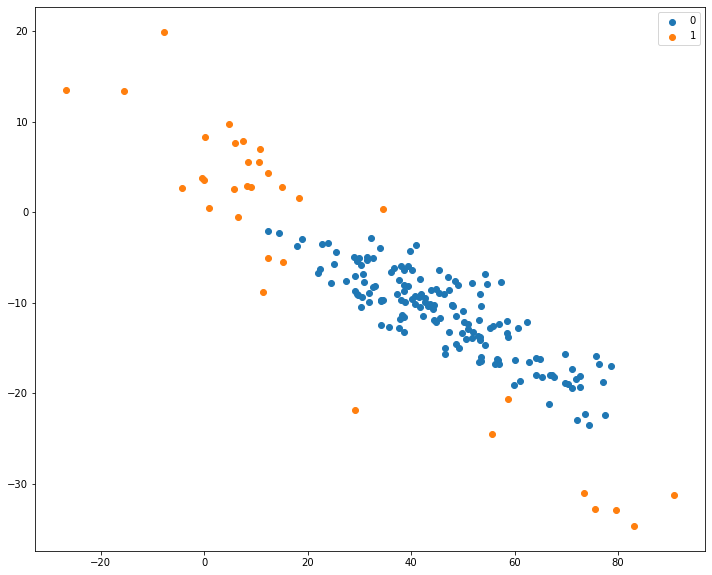

In [721]:
u_labels_gmm = np.unique(label_gmm)
 

plt.figure(figsize=(12, 10))

#plotting the results:
 
for i in u_labels_gmm:
    plt.scatter(z_mean[label_gmm == i , 0] , z_mean[label_gmm == i , 1] , label = i)
plt.legend()
plt.show()

<h2>ACCURACY</h2>

In [722]:
s=0
acc=0
for k in range(192):
    if db[k]!= -1:
        s+=1
        
        if db[k]==label_gmm[k]:
            acc=acc+1
        
acc=acc/s*100
print('Précision',acc)   

Précision 55.688622754491014
